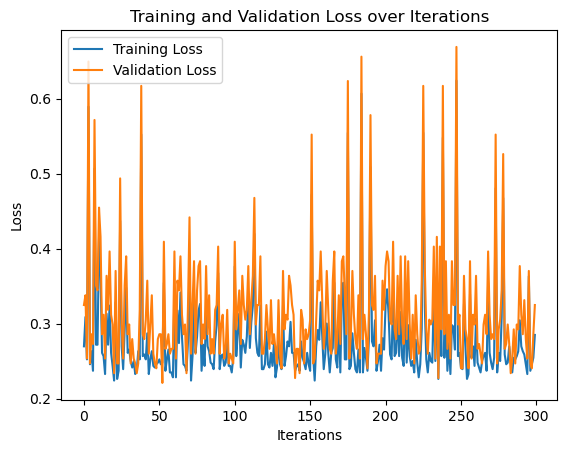

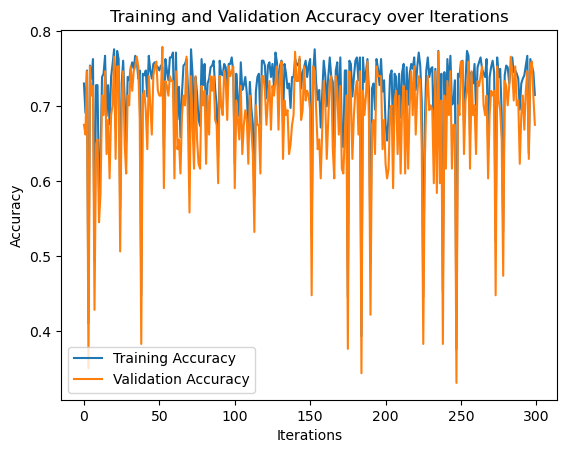

Test Accuracy: 0.6883


In [2]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file

# Load the dataset
X, y = load_svmlight_file("scaled.txt")
X = pd.DataFrame(X.toarray())
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X.columns = features
y[y == -1] = 0

for column in X.columns:
    median = X[X[column] != 0][column].median()
    X[column] = X[column].replace(0, median)

# Split data: training 0.6, test 0.2, validation 0.2
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

MaxIter = 300

train_accuracies = []
val_accuracies = []

model = Perceptron(max_iter=MaxIter, tol=None)  # Set max_iter and disable convergence check

for i in range(MaxIter):
    model.partial_fit(X_train, y_train, classes=[0, 1])
    
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))
    
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Calculate the losses
train_losses = [1 - acc for acc in train_accuracies]
val_losses = [1 - acc for acc in val_accuracies]

# Plotting the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")  # Added this line
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Iterations')
plt.legend()
plt.savefig('training_and_validation_loss_skl300.png')  
plt.show()

# Plotting the accuracies
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Iterations')
plt.legend()
plt.savefig('accuracy_skl300.png')  
plt.show()

# Test accuracy
test_acc = accuracy_score(y_test, model.predict(X_test))
print(f"Test Accuracy: {test_acc:.4f}")
